In [1]:
import numpy as np
from neural_network.layer import *
from neural_network.net import *
from queue import Queue
import matplotlib.pyplot as plt
from tqdm import tqdm
from neural_network.trainutils import *
import os

In [2]:
current_dir = os.getcwd()
face_dir = os.path.join(current_dir, "cmu+face+images", "faces")
dataset = Dataset(face_dir, flatten=False)

In [3]:
dataset.data.shape

(624, 120, 128)

In [4]:
train_dataset, _, test_dataset = train_test_split(dataset, (0.8, 0.0, 0.2))

In [5]:
len(train_dataset)

499

In [6]:
dataset[500][0].shape

(1, 1, 120, 128)

In [7]:
input_shape = train_dataset[0][0].shape
input_shape

(1, 1, 120, 128)

In [8]:
train_dataset[0]

(array([[[[ 0.3425722 ,  0.52130295,  0.83259749, ..., -0.38476291,
           -0.53701688, -0.55583037],
          [-1.4296351 , -1.07793655, -0.70707984, ..., -0.22104398,
           -0.3873068 , -0.40914766],
          [-1.52738878, -1.42946506, -1.54067591, ..., -0.41855085,
           -0.41875033, -0.37647925],
          ...,
          [-0.90116235, -0.95906038, -0.79888088, ..., -0.78153239,
           -0.79058586, -0.77789974],
          [-0.90365236, -0.83620502, -0.8259837 , ..., -0.77187457,
           -0.75274128, -0.7540892 ],
          [-0.77826152, -0.75772438, -0.39123564, ..., -0.79287848,
           -0.78441971, -0.77206879]]]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]))

In [9]:
kernel_shape = np.ndarray([1, 1, 3, 3])
pad = 1
stride = 1

conv1 = Conv2D(kernel_shape, pad, stride, layer_id=1) # 120x128
maxpool1 = MaxPool2D(2, 0, 2, conv1) # 60x64
relu1 = ReLU(maxpool1)

conv2 = Conv2D(kernel_shape, pad, stride, relu1, layer_id=2)
maxpool2 = MaxPool2D(2, 0, 2, conv2) # 30x32
relu2 = ReLU(maxpool2)

conv3 = Conv2D(kernel_shape, pad, stride, relu2, layer_id=3)
maxpool3 = MaxPool2D(2, 0, 2, conv3) # 15x16
relu3 = ReLU(maxpool3)

flatten = Flatten(relu3)

linear = Linear(15*16, len(dataset.keys), flatten)
softmax_layer = Softmax(linear)
loss_layer = CrossEntropy(softmax_layer)

model = NeuralNetwork(conv1, softmax_layer, loss_layer)

In [10]:
kernel_shape.shape

(1, 1, 3, 3)

In [11]:
print("Forward order:")
for layer in model._forward_order:
    print(layer)

print("\nBackward order:")
for layer in model._backward_order:
    print(layer)

Forward order:
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Flatten
Linear: (240, 1) -> (4, 1)
Softmax
CrossEntropy

Backward order:
CrossEntropy
Softmax
Linear: (240, 1) -> (4, 1)
Flatten
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1


In [12]:
results = k_fold_cross_validation(5, model, train_dataset, epochs=50, lr=1e-3, validation_period=5, seed=585)

Fold 0


[0.1622863]: 100%|██████████| 50/50 [06:07<00:00,  7.35s/it] 


Fold 1


[0.00209241]: 100%|██████████| 50/50 [06:18<00:00,  7.56s/it]


Fold 2


[0.0023174]: 100%|██████████| 50/50 [06:31<00:00,  7.83s/it] 


Fold 3


[0.00148141]: 100%|██████████| 50/50 [06:37<00:00,  7.95s/it]


Fold 4


[0.00263381]: 100%|██████████| 50/50 [06:22<00:00,  7.66s/it]


In [19]:
results


[{'train_losses': [array([1.4205982]),
   array([1.32318659]),
   array([1.29095413]),
   array([1.26870007]),
   array([1.24863335]),
   array([1.22742131]),
   array([1.20431641]),
   array([1.17829938]),
   array([1.14873024]),
   array([1.11654523]),
   array([1.0799616]),
   array([1.04207326]),
   array([1.00467318]),
   array([0.96628604]),
   array([0.9267597]),
   array([0.88405643]),
   array([0.83673226]),
   array([0.78544443]),
   array([0.72590846]),
   array([0.66195669]),
   array([0.59959771]),
   array([0.54107979]),
   array([0.49132643]),
   array([0.44898562]),
   array([0.41474171]),
   array([0.38154303]),
   array([0.34928038]),
   array([0.3187417]),
   array([0.29134658]),
   array([0.26376673]),
   array([0.23164156]),
   array([0.20798618]),
   array([0.17631576]),
   array([0.17156804]),
   array([0.1450337]),
   array([0.15289757]),
   array([0.13289813]),
   array([0.13324272]),
   array([0.10426711]),
   array([0.08946794]),
   array([0.213497]),
   arra

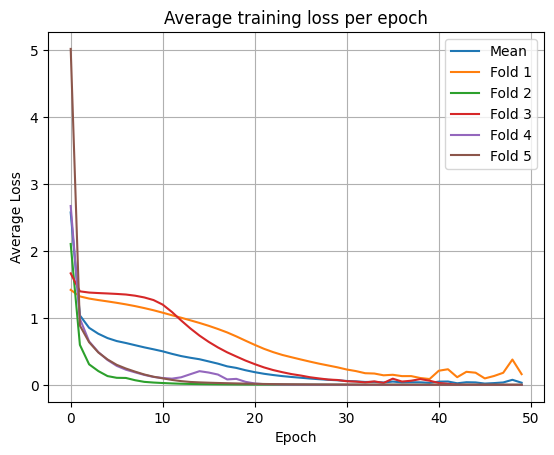

In [31]:
plt.plot(np.mean([res["train_losses"] for res in results], axis=0))

for res in results:
    plt.plot(res["train_losses"])
plt.title("Average training loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend(["Mean", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
plt.grid()

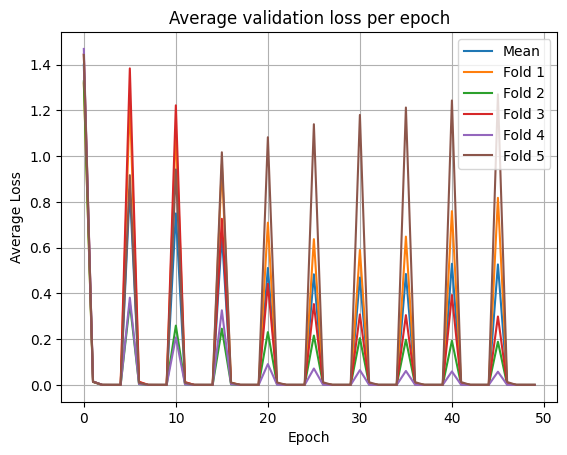

In [32]:
plt.plot(np.mean([res["validation_losses"] for res in results], axis=0))

for res in results:
    plt.plot(res["validation_losses"])
plt.title("Average validation loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend(["Mean", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
plt.grid()

In [15]:
unique, counts = np.unique(dataset.label, return_counts=True)

accuracy: 0.85


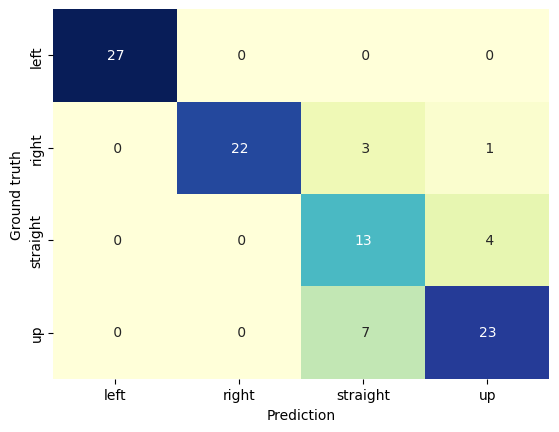

In [35]:
i = 1
import seaborn as sns
print(f"accuracy: {results[i]['validation_confmats'][-1].trace()/results[i]['validation_confmats'][-1].sum()}")

plt.figure()
sns.heatmap(results[i]["validation_confmats"][-1].astype(int), annot=True, cbar=False, xticklabels=dataset.keys, yticklabels=dataset.keys, cmap="YlGnBu", fmt="2d")
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
#plt.title(f"")
plt.show()

In [16]:
print(dataset.keys[unique])
print(counts)

['left' 'right' 'straight' 'up']
[157 155 156 156]


In [17]:
from PIL import Image
my_img = Image.open("test/woman_straight.jpg").convert("L")
my_img = np.array(my_img)#.reshape(-1, 1)
my_img.shape

(32, 30)

In [18]:
model.forward(my_img)

ValueError: not enough values to unpack (expected 4, got 2)